# ETUDE DYNAMYQUE DES METROS DE PARIS

## Introduction

Nous allons faire une étude sur le nombre de personne qui attentte a chaque métros.

paramètres:

* nb : nb de personne
* ar : % de personne qui arrive 
* so : % de perssonne qui sorte de la gare à force d'atendre
* ta : temps d'arriver du metro
* cm : capacité du metro



paramètres plus tard
* temps pour une perssonne a rentré / sortir

### Les importation

In [12]:
%matplotlib inline

from pylab import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np
from LibMetroIti_NB import *

In [13]:
#ligne;nom;niem_arret;
ar = 0
so = 0
ta = 2
cm = 0.5
    

# initialisation
on va commencer par deux gares relier entre elles.  
hypothèse :  
 * deplacement wagon instantané

In [14]:
N = 100
TMAX = 24*3600 + 1 # permet de reinitialiser le temps toute les 24h

class Station:
    def __init__(self, ar, so, name, station = -1, ta = 0, cm = 0):
        self.ar = ar # % d'arrivant dans la gare
        self.so = so # % de partant dans la gare
        self.nb = N # nombre de personne dans le metro
        self.t = 0   # initialisatien du temps de la gare
        self.ta = [ta] # temps entre chaque metro
        self.cm = [cm] # capacité d'un metro
        if station != -1:
            self.next_s = [station] # la prochaine gare
        else:
            self.next_s = [self] 
        self.name = name
    
    def update(self): # fonction qui actualise les donnés
        if self.so >= np.random.choice(100):
            n = np.random.choice(10)
            if self.nb - n >= 0:
                self.nb = self.nb - n
            else:
                self.nb = 0
        if self.ar >= np.random.choice(100):
            self.nb += np.random.choice(10)
        self.t = (self.t + 1) % TMAX
        for i in range(len(self.next_s)):
            if self.ta[i] != 0 and self.t % self.ta[i] == 0: #si metro est arrive
                if self.nb >= self.cm[i]: #si plus de monde que de place
                    #regarde si voy est arriver si cest pas le cas tu rajoute dans next
                    self.nb = self.nb - self.cm[i]
                else: #plus de place
                    self.nb = 0
                
    
    def next_station(self, station, ta, cm):
        self.next_s.append(station)
        self.ta.append(ta)
        self.cm.append(cm)

In [15]:
nb_step = 24*3600 #temps de lanalyse

cm = 700

ar1 = 32
so1 = 5
ta1 = 10*60 + 0 #min * 60 + sec

ar2 = 32
so2 = 5
ta2 = 10*60 + 0 #min * 60 + sec

## une simulation

In [16]:
TIME_CAPT = 60*60 + 0 # temps ent chaque prise d'info sur le nombre de perssonne en min*60 + sec (le tous sera en sec) 

def simulation(L):
    time = [] # liste qui represente le temps 
    nb_tot = []
    nb_station = []
    for t in range(nb_step):
        for j in L:
            j.update()
        if t % TIME_CAPT == 0:
            nb = 0
            time.append(t)
            k = 0
            for j in L:
                if k >= len(nb_station):
                    nb_station.append([])
                nb_station[k].append(j.nb)
                nb += j.nb
                k+=1
            nb_tot.append(nb)
    return (time, nb_tot, nb_station)


    
    

In [17]:
def init(List):
    List = []
    List_Gare.append(Station(ar1, so1,"gare 1"))
    List_Gare.append(Station(ar2, so2, "gare 2"))
    List[0].next_station(List_Gare[1], ta1, cm)
    List[1].next_station(List_Gare[0], ta2, cm)
    return List

In [18]:
def dessin(List_Gare):
    legende = []
    time, nb_tot, nb_station = simulation(List_Gare)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
    axes[0].plot(time, nb_tot, 'b')
    axes[0].set_xlabel("temps")
    axes[0].set_ylabel("nb de personne au total")
    for i in range(len(nb_station)):
        axes[1].plot(time, nb_station[i])
        legende.append('gare ' + str(i + 1))
    axes[1].legend(legende)
    axes[1].set_xlabel("temps")
    axes[1].set_ylabel("nb de personne par gare")

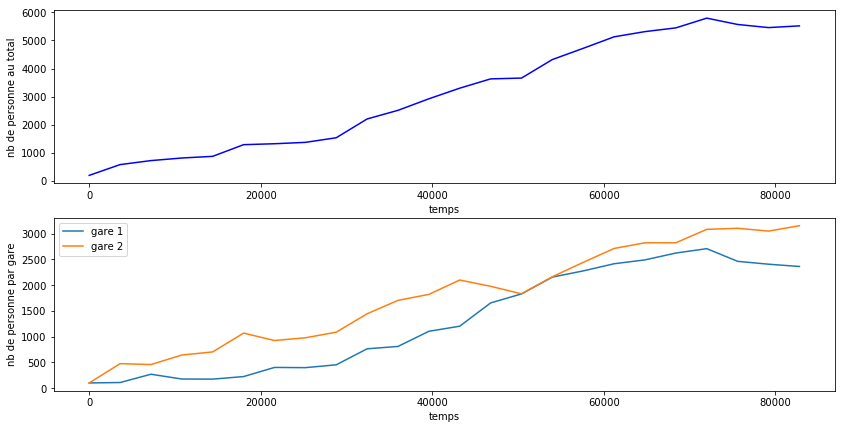

In [19]:
List_Gare = []
List_Gare.append(Station(ar1, so1,"gare 1"))
List_Gare.append(Station(ar2, so2, "gare 2"))
List_Gare[0].next_station(List_Gare[1], ta1, cm)
List_Gare[1].next_station(List_Gare[0], ta2, cm)


dessin(List_Gare)


## moyenner

In [20]:
ERR_INTERVAL = 1
def dessin_err(List_Gare, L_err, time, nb_tot): 
    legende = []
    time_err = [time[i] for i in range(len(time)) if i % ERR_INTERVAL  == 0]
    nb_tot_err = [nb_tot[i] for i in range(len(nb_tot)) if i % ERR_INTERVAL == 0]
    L_err_min = [L_err[i][0] for i in range(len(L_err)) if i % ERR_INTERVAL == 0]
    L_err_max = [L_err[i][1] for i in range(len(L_err)) if i % ERR_INTERVAL == 0]
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
    axes[0].plot(time, nb_tot, 'b')
    axes[0].errorbar(time_err, nb_tot_err, yerr=[L_err_min, L_err_max], ecolor='r')
    axes[0].set_xlabel("temps")
    axes[0].set_ylabel("nb de personne au total")
    for i in range(len(nb_station)):
        axes[1].plot(time, nb_station[i])
        legende.append('gare ' + str(i + 1))
    axes[1].legend(legende)
    axes[1].set_xlabel("temps")
    axes[1].set_ylabel("nb de personne par gare")

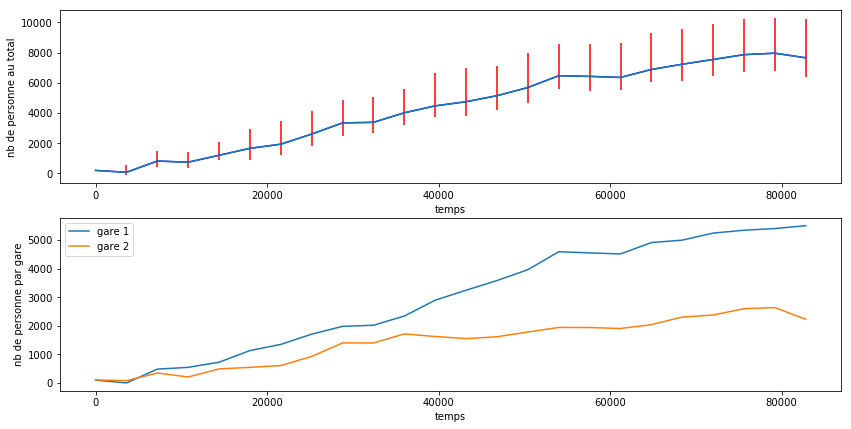

In [21]:
time, nb_tot_moy, nb_station_moy = simulation(List_Gare)

repet = 100

L=[]
L.append(nb_tot_moy.copy())
#initialisation 
for j in range(len(nb_tot_moy)):
    nb_tot_moy[j] = nb_tot_moy[j] / repet

for j in range(len(nb_station_moy)):
    for k in range(len(nb_station_moy[j])):
        nb_station_moy[j][k] = nb_station_moy[j][k] / repet

#recuperation des autre simulation
for i in range(repet - 1):
    #remise a 0
    List_Gare = []
    List_Gare.append(Station(ar1, so1,"gare 1"))
    List_Gare.append(Station(ar2, so2, "gare 2"))
    List_Gare[0].next_station(List_Gare[1], ta1, cm)
    List_Gare[1].next_station(List_Gare[0], ta2, cm)
    time, nb_tot, nb_station = simulation(List_Gare)
    L.append(nb_tot.copy())
    for j in range(len(nb_tot)):
        nb_tot_moy[j] += nb_tot[j] / repet
    for j in range(len(nb_station)):
        for k in range(len(nb_station[j])):
            nb_station[j][k] += nb_station[j][k] / repet

            
ecart_type = 95 / 100
L_err = [] # initialisation des barre d'érreur
x=0
for k in range(len(L[0])):
    for i in range(len(L[0])):
        for j in range(len(L)-1):
            if L[j][k]>L[j+1][k]:
                x=L[j][k]
                L[j][k]=L[j+1][k]
                L[j+1][k]=x
    L_err.append([nb_tot_moy[k] - L[round(repet*(1-ecart_type)/ 2)][k], L[round(repet*(1 - ((1-ecart_type)/ 2)))][k] - nb_tot_moy[k]])

    
dessin_err(List_Gare, L_err, time, nb_tot)

## Cas avec 3 gares où les métros font des allers/retours 

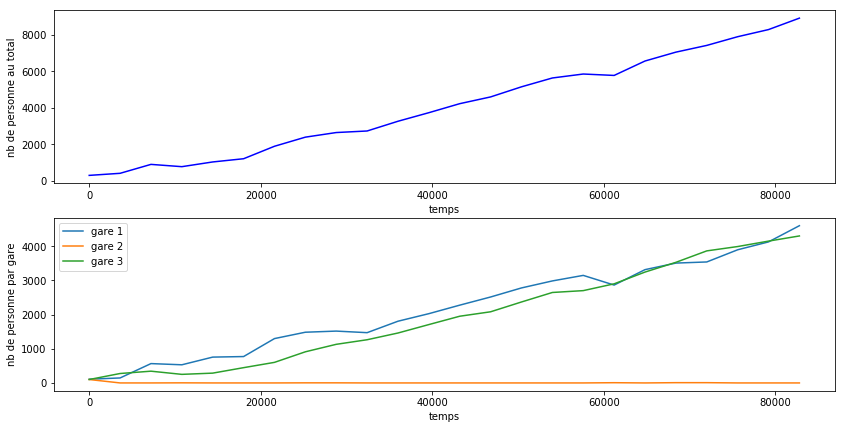

In [22]:
ar3 = 32
so3 = 5
ta3 =ta2

List_Gare = []

List_Gare.append(Station(ar1, so1, "gare 1"))
List_Gare.append(Station(ar2, so2, "gare 2"))
List_Gare.append(Station(ar3, so3, "gare 3"))

List_Gare[0].next_station(List_Gare[1], ta1, cm)
List_Gare[1].next_station(List_Gare[0], ta2, cm)
List_Gare[1].next_station(List_Gare[2], ta3, cm)
List_Gare[2].next_station(List_Gare[1], ta3, cm)


dessin(List_Gare)

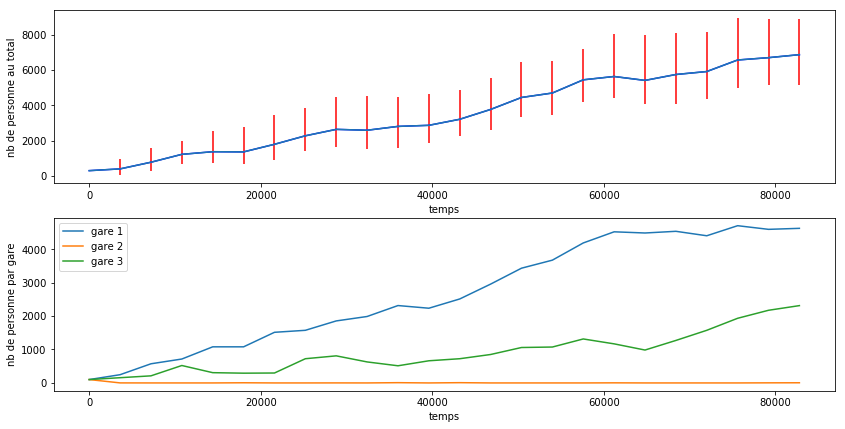

In [23]:
time, nb_tot_moy, nb_station_moy = simulation(List_Gare)

repet = 100 # nb de repetition pour le moyennage.

L=[]
L.append(nb_tot_moy.copy())
#initialisation 
for j in range(len(nb_tot_moy)):
    nb_tot_moy[j] = nb_tot_moy[j] / repet

for j in range(len(nb_station)):
    for k in range(len(nb_station[j])):
        nb_station[j][k] = nb_station[j][k] / repet

#recuperation des autre simulation
for i in range(repet - 1):
    #remise a 0
    List_Gare = []
    List_Gare.append(Station(ar1, so1,"gare 1"))
    List_Gare.append(Station(ar2, so2, "gare 2"))
    List_Gare.append(Station(ar3, so3, "gare 2"))
    List_Gare[0].next_station(List_Gare[1], ta1, cm)
    List_Gare[1].next_station(List_Gare[0], ta2, cm)
    List_Gare[1].next_station(List_Gare[2], ta2, cm)
    List_Gare[2].next_station(List_Gare[1], ta2, cm)
    
    
    time, nb_tot, nb_station =simulation(List_Gare)
    L.append(nb_tot.copy())
    for j in range(len(nb_tot)):
        nb_tot_moy[j] += nb_tot[j] / repet
    for j in range(len(nb_station)):
        for k in range(len(nb_station[j])):
            nb_station[j][k] += nb_station[j][k] / repet


ecart_type = 95 / 100 #def ecart type comme etant 
L_err = [] # inistialistation barre d'erreur
x=0
for k in range(len(L[0])):
    for i in range(len(L[0])):
        for j in range(len(L)-1):
            if L[j][k]>L[j+1][k]:
                x=L[j][k]
                L[j][k]=L[j+1][k]
                L[j+1][k]=x


    L_err.append([nb_tot_moy[k] - L[round(repet*(1-ecart_type)/ 2)][k], L[round(repet*(1 - ((1-ecart_type)/ 2)))][k] - nb_tot_moy[k]])

    
dessin_err(List_Gare, L_err, time, nb_tot)

In [24]:
N = 100
TMAX = 24*3600 + 1 # permet de reinitialiser le temps toutes les 24h

class Station:
    def __init__(self, name):
        #self.ar = ar # % d'arrivant dans la gare
        #self.so = so # % de partant dans la gare
        self.nb = [] # nombre de personnes dans la gare
        self.t = 0   # initialisation du temps de la gare
        self.pers = [[]] #list(next, debut, fin)
        self.next_s = [] # la prochaine gare
        self.ta = [] # temps entre chaque train
        self.cm = [] # capacité d'un train
        self.name = name
        self.ligne = []
    
    def update(self): # fonction qui actualise les données
        self.t = (self.t + 1) % TMAX
        for i in range(len(self.next_s)):
            if self.ta[i] != 0 and self.t % self.ta[i] == 0: #si metro est arrivé
                id_suppr = []
                #les gens sortent
                for j in range(len(self.pers)):
                    if self.pers[j][2] == self.name: #2 donne l'arrivé
                        id_suppr.append(j)
                for j in range(len(id_suppr) - 1):
                    del self.pers[id_suppr[-j]]
                
                #les gens entre dans le train
                for j in range(len(self.nb)):
                    if j[0] == self.next_s[i].name: #0 donne le next
                        if self.cm[i] - len(self.pers[i]) > 0: #si plus de monde que de place
                            self.nb = self.nb - self.cm[i]
                            self.pers.append(self.nb(j))
                        else: #plus de place
                            self.nb = []
                save = self.pers
                self.next_s.update()
                self.next_s.pers[i] = save
    
    
    
    def next_station(self, station, ta, cm, ligne):
        self.next_s.append(station)
        self.ta.append(ta)
        self.cm.append(cm)
        self.ligne.append(ligne)

In [25]:
if os.name == 'nt':
    L=listeMetroCsv(".\\data\\liste stations.csv") #list([ligne,station,num_station])
    Lex=listeMetroCsvStation(".\\data\\liste stations exceptions-fourche2.csv") #list([ligne,station,num_station])
    Lf=listeMetroCsvStation(".\\data\\liste stations fourche1.csv") #list([ligne,station,num_station])
    Linfos=listeMetroCsvInfos(".\\data\\infos_metro.csv") #list([ligne,nb_arrets,temps de trajet, capacité rame])
else:
    L=listeMetroCsv("./data/liste stations.csv") #list([ligne,station,num_station])
    Lex=listeMetroCsvStation("./data/liste stations exceptions-fourche2.csv") #list([ligne,station,num_station])
    Lf=listeMetroCsvStation("./data/liste stations fourche1.csv") #list([ligne,station,num_station])
    Linfos=listeMetroCsvInfos("./data/infos_metro.csv") #list([ligne,nb_arrets,temps de trajet, capacité rame])

In [26]:
def list_gare_par_ligne(name): #name de la forme "M[1-14b?]" ex : "M3b" ou "M3"
    Li=list()
    for var in L:
        if var[0]==name:
            Li.append(var)
    retu
                       rn Li

In [27]:
def info_ligne(name): #name de la forme "M[1-14b?]" ex : "M3b" ou "M3"
    for var in Linfos:
        if var[0]==name:
            return var #list([ligne,nb_arrets,temps de trajet, capacité rame])

In [1]:
def init_gare(L): # L : list([ligne,station,num_station])
    List_Gare = []
    nom_ligne = []
    List_initialise = []
    for i in range(len(L) - 1):
        List_Gare.append(L[i][1])
        nom_ligne.append(L[i][0])
        if len(List_initialise) == 0 or L[i][1] not in [List_initialise[j].name for j in range(len(List_initialise))]:
            List_initialise.append(Station(L[i][1]))
        for j in range(len(List_initialise)):
            if (List_initialise[j].name == L[i][1] and i+1 < len(L) and L[i][0] == L[i+1][0]):
                L_tmp = [List_initialise[j].name for j in range(len(List_initialise))]
                if L[i+1][1] not in L_tmp:
                    List_initialise.append(Station(L[i+1][1]))
                    L_tmp = [List_initialise[j].name for j in range(len(List_initialise))]
                L_data = info_ligne(L[1][0])
                List_initialise[j].next_station(List_initialise[L_tmp.index(L[i+1][1])], L_data[1], L_data[2], L[i][0])
    return List_initialise
                       
print([(i.name, [i.name for i in i.next_s]) for i in init_gare(L)]
      
def init_gare(L): # L : list([ligne,station,num_station])
    List_initialise = []
    for i in range(len(L) - 1):
        if len(List_initialise) == 0 or L[i][1] not in [List_initialise[j].name for j in range(len(List_initialise))]:
            List_initialise.append(Station(L[i][1]))
        for j in range(len(List_initialise)):
            if (List_initialise[j].name == L[i][1] and i+1 < len(L) and L[i][0] == L[i+1][0]):
                L_tmp = [List_initialise[j].name for j in range(len(List_initialise))]
                if L[i+1][1] not in L_tmp:
                    List_initialise.append(Station(L[i+1][1]))
                    L_tmp = [List_initialise[j].name for j in range(len(List_initialise))]
                L_data = info_ligne(L[1][0])
                List_initialise[j].next_station(List_initialise[L_tmp.index(L[i+1][1])], L_data[1], L_data[2], L[i][0])
    for j in List_initialise:
        for k in range(len(j.next_s)):
            L_data = info_ligne(j.ligne[k])
            j.next_s[k].next_station(j, L_data[1], L_data[2], j.ligne[k])
                       
print([(i.name, [i.name for i in i.next_s]) for i in init_gare(L)])

NameError: name 'L' is not defined